In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/K2CO3-all.csv')
df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,total_vol,metal_total_conc,K2CO3_total_conc,...,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,FeCl3,destination,XRD,singlephase
0,3.00,0.9,0.15,1.3500,9.00,11.738561,1,9.30,0.100000,0.150000,...,0.952650,1,0.005301,9.928170e-09,-8.003131,4.682620e-07,1,0227-17,"Spinel,ZnO",False
1,0.30,0.9,0.15,1.3500,9.00,11.738561,1,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-19,"Spinel,ZnO",False
2,3.00,1.5,0.15,1.3500,9.00,11.738561,6,9.50,0.160000,0.140000,...,1.222594,1,0.005189,1.490280e-08,-7.826733,7.180060e-07,1,0227-21,"Spinel,?",False
3,0.30,0.9,0.15,1.3500,9.00,11.738561,6,12.00,0.080000,0.110000,...,0.732054,1,0.004108,3.697130e-09,-8.432136,2.250000e-07,1,0227-23,"Spinel,ZnO",False
4,3.00,1.5,0.45,1.3500,3.00,11.977121,1,3.50,0.430000,0.390000,...,3.324066,1,0.008132,1.541350e-07,-6.812099,4.738780e-06,1,0227-25,"Spinel,Fe2O3",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.17,1.0,0.41,1.5006,3.66,11.956907,6,9.54,0.104822,0.157233,...,0.997544,0,0.003474,2.930080e-09,-8.533121,2.108530e-07,0,0509-#21,NaN,True
66,1.00,0.5,0.15,0.7500,5.00,11.738561,1,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#21,NaN,True
67,1.00,0.5,0.15,0.7500,5.00,11.738561,6,5.50,0.090000,0.140000,...,0.872490,1,0.004979,7.407220e-09,-8.130345,3.719010e-07,0,0514-#22,NaN,False
68,1.00,0.5,0.45,0.7515,1.67,11.977121,1,2.17,0.230000,0.350000,...,2.203650,1,0.007301,5.967200e-08,-7.224229,2.043300e-06,0,0514-#23,NaN,False


In [3]:
# df = pd.read_csv('K2CO3-all.csv', usecols=['rate', 'FeCl3', 'precipitation_order',
#                                            'singlephase', 'ionic_total','ionic_metal',
#                                           'Q_Fe(OH)3', 'metal_total_conc', 'K2CO3_total_conc', 'ph'])


random_indices = np.random.permutation(df.index)
df = df.reindex(random_indices).reset_index(drop=True)


#%% preprocessing df
# replace the value 'reverse' in the column "precipitation_order" as 1
df['precipitation_order'] = df['precipitation_order'].replace('reverse', 1.0)
# replace the value 'normal' in the column "precipitation_order" as 0 for X
df['precipitation_order'] = df['precipitation_order'].replace('normal', 0.0)

df = df.drop(columns=['XRD', 'destination', 'total_vol'])

# df = df.drop(columns=['temperature', 'precipitation_order', 'K2CO3_conc', 'total volume'])
X_labels = df.columns[:-2]
y_label = df.columns[-1]



#%% preprocessing y
# replace "True" as True, "False" as False, and "no" as None
# single phase is positve, multiphase is negative
df[y_label] = df[y_label].replace('TRUE', True)
df[y_label] = df[y_label].replace('FALSE', False)
df[y_label] = df[y_label].replace('no', None)
# No means xrd can’t be measured due to sample size
# drop rows with None in the column y_label
df = df.dropna(subset=[y_label]).reset_index(drop=True)
# set df[y_label] to boolean
df[y_label] = df[y_label].astype(np.float32)


X, y = df[X_labels], df[y_label]

df

,metal_initial_conc,metal_mmol,K2CO3_initial_conc,K2CO3_mmol,K2CO3_vol,ph,rate,metal_total_conc,K2CO3_total_conc,ionic_Fe3+,...,ionic_CO32-,ionic_metal,ionic_total,precipitation_order,OH_total,Q_Fe(OH)3,logQ_Fe(OH)3,Q_Co(OH)2,FeCl3,singlephase
0,1.670000,1.500000,0.450000,2.700000,6.00,11.977121,6,0.220000,0.390000,0.660000,...,0.780000,0.806667,2.274125,1,0.008249,8.233830e-08,-7.084398,0.000002,1,0.0
1,1.000000,0.500000,0.450000,0.751500,1.67,11.977121,6,0.230000,0.350000,0.690000,...,0.700000,0.843333,2.203650,1,0.007301,5.967200e-08,-7.224229,0.000002,1,1.0
2,1.914894,0.995745,0.353866,1.500393,4.24,11.924935,1,0.209190,0.315209,0.627570,...,0.630417,0.767030,1.995323,1,0.007494,5.868540e-08,-7.231470,0.000002,1,0.0
3,3.000000,1.500000,0.450000,1.350000,3.00,11.977121,1,0.430000,0.390000,1.290000,...,0.780000,1.576667,3.324066,1,0.008132,1.541350e-07,-6.812099,0.000005,1,0.0
4,1.130000,0.990000,0.320000,1.500800,4.69,11.903090,2,0.180000,0.270000,0.540000,...,0.540000,0.660000,1.713368,0,0.006736,3.667790e-08,-7.435596,0.000001,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1.040000,1.000000,0.300000,1.500000,5.00,11.889076,6,0.167785,0.251678,0.503356,...,0.503356,0.615213,1.597209,0,0.006498,3.069450e-08,-7.512939,0.000001,1,0.0
66,1.090000,1.000000,0.360000,1.515600,4.21,11.928666,6,0.194932,0.296296,0.584795,...,0.592593,0.714750,1.867030,0,0.006964,4.388180e-08,-7.357716,0.000002,0,0.0
67,0.600000,1.800000,0.430000,2.674600,6.22,11.967249,2,0.200000,0.290000,0.600000,...,0.580000,0.733333,1.873131,0,0.006263,3.275510e-08,-7.484721,0.000001,1,0.0
68,1.090000,1.800000,0.360000,2.728800,7.58,11.928666,6,0.200000,0.290000,0.600000,...,0.580000,0.733333,1.873484,0,0.006968,4.511700e-08,-7.345660,0.000002,1,0.0


(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

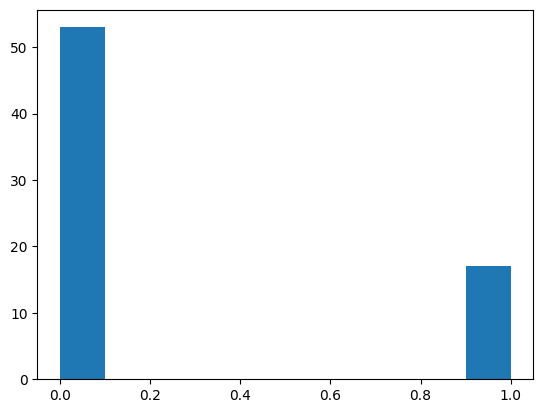

In [4]:
plt.hist(y)

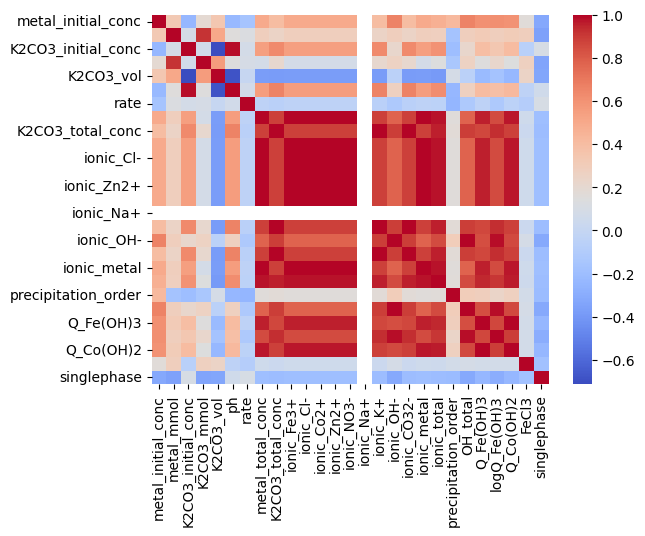

In [5]:
correlation_matrix  = df.corr(numeric_only=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

## Using kernel learning

In [6]:
def kernel_numeric(x1, x2, kernel_type='RBF', gamma=1.0):
    """
    Compute kernel between two vectors.
    
    Parameters:
    - x1, x2: Input vectors.
    - kernel_type: Type of the kernel to use ('RBF', 'Manhattan', 'Euclidean').
    - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).
    
    Returns:
    - The kernel value based on the selected kernel type.
    """
    if kernel_type == 'Euclidean':
        return np.sqrt(np.sum((x1 - x2) ** 2))
    elif kernel_type == 'Manhattan':
        return np.sum(np.abs(x1 - x2))
    elif kernel_type == 'RBF':
        distance_squared = np.sum((x1 - x2) ** 2)
        return np.exp(-gamma * distance_squared)

def compute_distances(X1, X2, kernel_type='Euclidean', gamma=0.1):
    """
    Compute distances or kernel values between two sets of vectors.

    Parameters:
    - X1, X2: Input datasets. Each should be a NumPy array of shape (n_samples, n_features).
    - kernel_type: Type of the metric or kernel to compute ('RBF', 'Manhattan', 'Euclidean').
    - gamma: Gamma parameter for the RBF kernel, where gamma = 1 / (2 * sigma^2).

    Returns:
    - A matrix of distances or kernel values.
    """
    # Calculate the pairwise difference matrix
    diff = X1[:, np.newaxis, :] - X2[np.newaxis, :, :]


    if kernel_type == 'Euclidean':
        # Compute Euclidean distance
        distances = np.sqrt(np.sum(diff**2, axis=2, keepdims=False))
    elif kernel_type == 'Manhattan':
        # Compute Manhattan distance
        distances = np.sum(np.abs(diff), axis=2, keepdims=False)
    elif kernel_type == 'RBF':
        # Compute RBF kernel
        distance_squared = np.sum(diff**2, axis=2, keepdims=False)
        distances = np.exp(-gamma * distance_squared)
    else:
        raise ValueError("Unsupported kernel type")

    return distances


In [7]:
#%% define random forest model for classification
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
# xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from tqdm import tqdm

rfc = RandomForestClassifier(
    n_estimators=300, 
    # bootstrap=False,
    # max_features=5,
    # max_depth=5,
    # n_jobs=-1,
    random_state=1,
#     class_weight='balanced'
    )

kernel_classifier = SVC(kernel='poly', probability=True, random_state=42,class_weight='balanced')

xgb = XGBClassifier(
        learning_rate=0.1,
        reg_lambda = 0.5,
        n_estimators=1000, 
#         num_parallel_tree=5,
#         max_depth = 50,
        random_state=None,
        tree_method='hist',
#     colsample_bytree=0.8
        )


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.preprocessing import MinMaxScaler
kernel = 1e-1 * RBF(1e-3)  # RBF Kernel with given length scale
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)


clf = xgb

# Initialize LeaveOneOut
loo = LeaveOneOut()

# Array to store the predictions for each sample
predictions = np.zeros(len(y))
# Perform LOOCV
for train_index, test_index in tqdm(loo.split(X), total=loo.get_n_splits(X), desc="Processing LeaveOneOut"):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # # Standardize each feature
    scaler = MinMaxScaler()
#     scaler = StandardScaler()
    kernel_type = 'Euclidean'
    X_train_S = scaler.fit_transform(X_train)
    X_test_S = scaler.transform(X_test)
    X_train_sfs = compute_distances(X_train_S, X_train_S,  kernel_type=kernel_type)


    X_test_sfs = compute_distances(X_test_S, X_train_S, kernel_type=kernel_type)

    # Fit the model
    clf = xgb
    clf.fit(X_train_sfs, y_train)
    
    # Make predictions and store them
    predictions[test_index] = clf.predict(X_test_sfs)
    # break


print(f'LOOCV estimate predictions: {predictions}')

Processing LeaveOneOut: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:10<00:00,  6.60it/s]

LOOCV estimate predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
compute_distances(X_train_S, X_train_S,  kernel_type=kernel_type)

array([[0.        , 1.34705246, 1.38627692, ..., 1.49680192, 1.65256989,
        1.35491853],
       [1.34705246, 0.        , 1.26634578, ..., 1.27928729, 1.99254213,
        1.85502925],
       [1.38627692, 1.26634578, 0.        , ..., 1.46581743, 1.49477527,
        1.71693393],
       ...,
       [1.49680192, 1.27928729, 1.46581743, ..., 0.        , 1.21645353,
        0.88974867],
       [1.65256989, 1.99254213, 1.49477527, ..., 1.21645353, 0.        ,
        0.89144183],
       [1.35491853, 1.85502925, 1.71693393, ..., 0.88974867, 0.89144183,
        0.        ]])

LOOCV estimate accuracy: 0.829
LOOCV estimate balanced accuracy: 0.747
LOOCV estimate AUC: 0.747


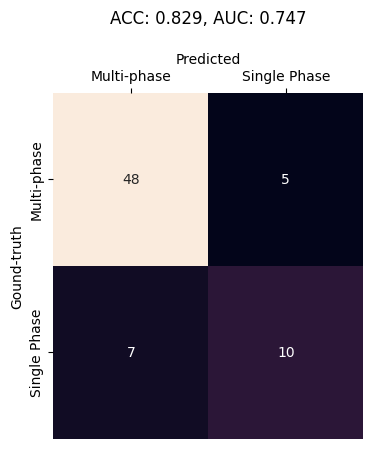

In [9]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score



# Calculate accuracy
accuracy = accuracy_score(y, predictions)
print(f'LOOCV estimate accuracy: {accuracy:.3f}')

# calculation balanced accuracy
balanced_accuracy = balanced_accuracy_score(y, predictions)
print(f'LOOCV estimate balanced accuracy: {balanced_accuracy:.3f}')

# Calculate AUC
auc = roc_auc_score(y, predictions)
print(f'LOOCV estimate AUC: {auc:.3f}')

#%% confusion matrix
from sklearn.metrics import confusion_matrix
confuse_matrix = confusion_matrix(y, predictions)

# Convert to DataFrame and replace 0 and 1
confuse_matrix_df = pd.DataFrame(confuse_matrix, 
                                 columns=['Multi-phase', 'Single Phase'], 
                                 index=['Multi-phase', 'Single Phase'])



# plot confuse matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confuse_matrix_df, annot=True, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Gound-truth')
# show x label and x ticks on the top
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
# set fig size
plt.gcf().set_size_inches(4, 4.5)

# add metrics to the title
plt.title(f'ACC: {accuracy:.3f}, AUC: {auc:.3f}\n',fontsize=12)
plt.savefig('confusion_matrix.png', dpi=400,  bbox_inches='tight')

#%%
# train on the whole dataset
# clf.fit(X, y)

#%%
# get feature importance
# feature_importance = clf.feature_importances_
# feature_importance_df = pd.DataFrame(feature_importance, index=X.columns, columns=['Feature importance'])
# feature_importance_df = feature_importance_df.sort_values(by='Feature importance', ascending=False)
# # plot feature importance
# feature_importance_df.plot(kind='barh', figsize=(6, 8))